클라이언트 > 요청(request : url ) > 경로(DNS) > 서버 

dns : www.naver.com 123.456.66.77

서버 > db >  결과 > response(json, html, css, javascript) > 클라이언트 (어떤방식으로 보내줬지?)


In [ ]:
1. 동적인페이지(url 변경 안됨)
2. 정적인페이지(url 변경,(url변경안되면서 화면이 깜빡))
requests방법 처리 가능
3. 2가지 방버으로 안된 페이지에서는 selenium(개발자동화를 목적으로 만들어진 도구)
4.방법
 - 싸이트 검색
 - 크롤링 허락문서 (robots.txt)
   - 개인허락, 기업허락
 - 싸이트의 결과 보고 어떤 방식의  response를 우리에게주는지 확인
 - 접근방식 결정
 - 속이고 매우다양한 방식으로 속이고 들어간다.

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from bs4 import BeautifulSoup
import re


pd.set_option('display.max_columns', None) # 컬럼 생략 없이 보이게 하는 판다스 옵션 변경! 

In [422]:
def get_KOSPI(page):
    KOSPI_df = pd.DataFrame()
    for page_num in range(1, page + 1):
        url = f'https://m.stock.naver.com/api/index/KOSPI/price?pageSize=10&page={page_num}'
        res = requests.get(url)  
        temp_df = pd.DataFrame(res.json())
        KOSPI_df = pd.concat([KOSPI_df, temp_df])
    return KOSPI_df
KOSPI_df = get_KOSPI(3)

In [423]:
def get_KOSDAQ(page):
    KOSDAQ_df = pd.DataFrame()
    for page_num in range(1, page + 1):
        url = f'https://m.stock.naver.com/api/index/KOSDAQ/price?pageSize=10&page={page_num}'
        res = requests.get(url)  
        temp_df = pd.DataFrame(res.json())
        KOSDAQ_df = pd.concat([KOSDAQ_df, temp_df])
    return KOSDAQ_df
KOSDAQ_df = get_KOSDAQ(3)

In [424]:
def get_currency_exchange(page):    
    usd_df = pd.DataFrame()
    for page_num in range(1, page+1):
        url = 'https://m.stock.naver.com/front-api/v1/marketIndex/prices?category=exchange&reutersCode=FX_USDKRW&page={}'.format(page_num)
        res=requests.get(url)
        temp_df=pd.DataFrame(res.json()['result'])            
        usd_df = pd.concat([usd_df, temp_df], ignore_index=True)
    return usd_df
dollar_df = get_currency_exchange(3)

In [431]:
KOSDAQ_df

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2024-01-29,819.14,-18.10,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-2.16,841.21,841.21,815.54
1,2024-01-26,837.24,13.50,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.64,818.76,839.52,817.06
2,2024-01-25,823.74,-12.47,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.49,833.34,833.34,820.64
3,2024-01-24,836.21,-3.90,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.46,841.45,842.90,828.12
4,2024-01-23,840.11,0.42,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.05,840.62,848.65,833.24
5,2024-01-22,839.69,-2.98,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.35,848.87,849.32,836.89
6,2024-01-19,842.67,2.34,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.28,848.66,856.05,837.87
7,2024-01-18,840.33,7.28,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.87,834.01,848.63,830.06
8,2024-01-17,833.05,-21.78,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-2.55,856.61,856.97,832.70
9,2024-01-16,854.83,-4.88,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.57,857.39,864.90,846.47


In [440]:
merged_df.columns

Index(['localTradedAt', 'closePrice_x', 'closePrice_y', 'closePrice',
       'fluctuations', 'fluctuationsRatio', 'fluctuationsType', 'cashBuyValue',
       'cashSellValue', 'sendValue', 'receiveValue'],
      dtype='object')

In [444]:
merge_df=pd.merge(KOSDAQ_df, KOSPI_df, left_on='localTradedAt', right_on='localTradedAt')
merge_df=merge_df[['localTradedAt', 'closePrice_x','closePrice_y']]
merged_df=pd.merge(merge_df, dollar_df, left_on = 'localTradedAt', right_on = 'localTradedAt')
merged_df = merged_df[['localTradedAt', 'closePrice_x', 'closePrice_y', 'closePrice']]
merged_df=merged_df.rename(columns={'localTradedAt':'Day','closePrice_x':'KOSPI', 'closePrice_y':'KOSDAQ','closePrice':'$'})
len(merged_df)

,Day,KOSPI,KOSDAQ,$
0,2024-01-29,819.14,"2,500.65","1,337.00"
1,2024-01-26,837.24,"2,478.56","1,338.00"
2,2024-01-25,823.74,"2,470.34","1,336.00"
3,2024-01-24,836.21,"2,469.69","1,332.00"
4,2024-01-23,840.11,"2,478.61","1,338.50"
5,2024-01-22,839.69,"2,464.35","1,340.00"
6,2024-01-19,842.67,"2,472.74","1,337.50"
7,2024-01-18,840.33,"2,440.04","1,341.00"
8,2024-01-17,833.05,"2,435.90","1,346.50"
9,2024-01-16,854.83,"2,497.59","1,337.00"


In [473]:
for i in merged_df.columns[1:]:
    try:
        merged_df[i] = merged_df[i].astype('float')
        merged_df
    except:
        merged_df[i] = merged_df[i].str.replace(',','').astype('float')
        merged_df    
merged_df['Day'] = pd.to_datetime(merged_df['Day'])
merged_df.dtypes

Day       datetime64[ns]
KOSPI            float64
KOSDAQ           float64
$                float64
dtype: object

In [476]:
merged_df

,Day,KOSPI,KOSDAQ,$
0,2024-01-29,819.14,2500.65,1337.0
1,2024-01-26,837.24,2478.56,1338.0
2,2024-01-25,823.74,2470.34,1336.0
3,2024-01-24,836.21,2469.69,1332.0
4,2024-01-23,840.11,2478.61,1338.5
5,2024-01-22,839.69,2464.35,1340.0
6,2024-01-19,842.67,2472.74,1337.5
7,2024-01-18,840.33,2440.04,1341.0
8,2024-01-17,833.05,2435.90,1346.5
9,2024-01-16,854.83,2497.59,1337.0


In [61]:
#다양한 명령어
%matplotlib inline
%pwd
%ls

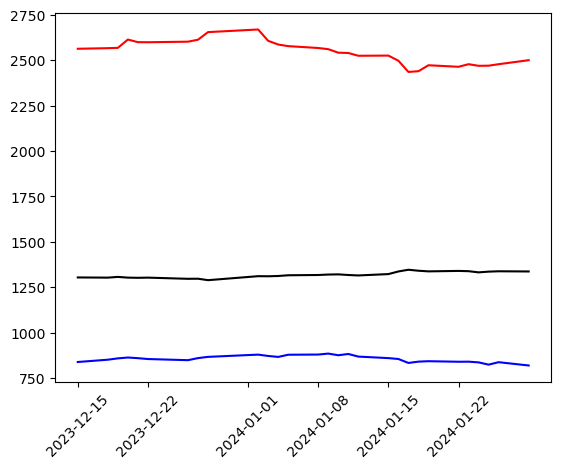

In [481]:
plt.plot(merged_df['Day'],merged_df['KOSPI'],'b')
plt.plot(merged_df['Day'],merged_df['KOSDAQ'],'r' )
plt.plot(merged_df['Day'],merged_df['$'],'k')
plt.xticks(rotation=45)
plt.show()

In [482]:
merged_df

,Day,KOSPI,KOSDAQ,$
0,2024-01-29,819.14,2500.65,1337.0
1,2024-01-26,837.24,2478.56,1338.0
2,2024-01-25,823.74,2470.34,1336.0
3,2024-01-24,836.21,2469.69,1332.0
4,2024-01-23,840.11,2478.61,1338.5
5,2024-01-22,839.69,2464.35,1340.0
6,2024-01-19,842.67,2472.74,1337.5
7,2024-01-18,840.33,2440.04,1341.0
8,2024-01-17,833.05,2435.90,1346.5
9,2024-01-16,854.83,2497.59,1337.0


In [487]:
merged_df.columns

Index(['Day', 'KOSPI', 'KOSDAQ', '$'], dtype='object')

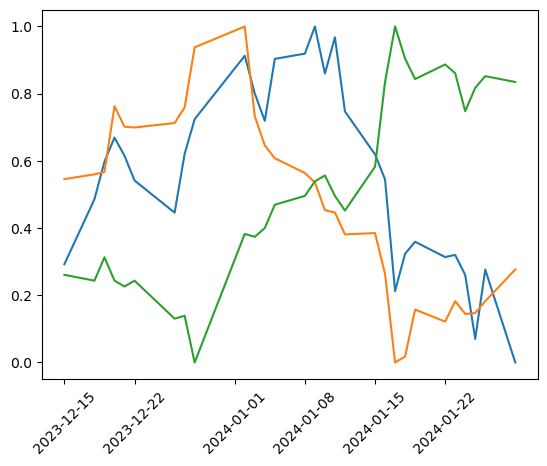

In [489]:
for i in merged_df.columns[1:]:
    plt.plot(merged_df['Day'],preprocessing.minmax_scale(merged_df[i]))
plt.xticks(rotation=45)
plt.show()

In [129]:
print(np.corrcoef(merge_df['KOSPI'], merge_df['KOSDAQ'])[0,1])
print(np.corrcoef(merge_df['KOSPI'], merge_df['USD'])[0,1])
print(np.corrcoef(merge_df['KOSDAQ'], merge_df['USD'])[0,1])



0.7215659291096479
-0.8451833887167481
-0.38799706225155445


In [495]:
len(merged_df.columns[1:])

3

In [499]:
range(len(merged_df.columns[1:])-1)

range(0, 2)

In [501]:
for i in range(1,4):
    for j in range(i+1, 4):
        coef = np.corrcoef(merged_df.iloc[:,i], merged_df.iloc[:,j])[0,1]
        print('{}와 {}의 corrcoef는 {}'.format(merged_df.columns[i],merged_df.columns[j],coef))

KOSPI와 KOSDAQ의 corrcoef는 0.6464168905878936
KOSPI와 $의 corrcoef는 -0.5182709467106922
KOSDAQ와 $의 corrcoef는 -0.9120548029311565


### Crawling Project

In [506]:
# #https://www.urldecoder.org/ -> decode
# #search
# https://apis.zigbang.com/v2/search?leaseYn=N&q=서초&serviceType=아파트

In [507]:
# #https://www.urldecoder.org/ -> decode
# #ondanji
# https://apis.zigbang.com/apt/locals/prices/on-danjis?minPynArea=10평이하&maxPynArea=60평대이상&geohash=wydm3

In [508]:
region = '서초'
living_type = '아파트'
url = "https://apis.zigbang.com/v2/search?leaseYn=N&q={}&serviceType=아파트".format(region,living_type)

res = requests.get(url)# 여기서 바로 못 가져온다.
res.content

data = res.json()['items'][0]

In [509]:
lat, long = data['lat'],data['lng']
print(lat,long)

37.4835624694824 127.032592773438


In [510]:
import geohash2 #전세계의 어떤 위치이든지 유일한 문자열로 표현 할 수 있다
geohash = geohash2.encode(lat,long, precision=5) #위,경, 정밀도(0 세계지도, 17건물 )
geohash 

'wydm4'

In [511]:
url2 = "https://apis.zigbang.com/apt/locals/prices/on-danjis?minPynArea=10평이하&maxPynArea=60평대이상&geohash={}".format(geohash)

In [512]:
res = requests.get(url2)
data = res.json()['filtered']
data

df = pd.DataFrame(data)
df['max_price'] = df['price'].apply(lambda x:x['sales']['max'] if isinstance (x,dict) else None) 
df['min_price'] = df['price'].apply(lambda x:x['sales']['min'] if isinstance (x,dict) else None) 
df['perArea_price'] = df['price'].apply(lambda x:x['sales']['perArea'] if isinstance (x,dict) else None) 

In [513]:
if 'price' in df.columns:
    df.drop(['price'], axis=1, inplace=True)

In [515]:
col = ['id', 'name', 'lat', 'lng', '총세대수', 'gugun', 'dong','max_price','min_price', 'perArea_price']
df = df[col]

In [516]:
df['lat'] = round(df['lat'],4)
df['lng'] = round(df['lng'],4)

In [517]:
df

,id,name,lat,lng,총세대수,gugun,dong,max_price,min_price,perArea_price
0,38131,방배아트자이,37.4800,127.0023,353,서초구,방배동,279000.0,165000.0,6677.0
1,18148,"임광1,2차",37.4771,127.0025,418,서초구,방배동,228000.0,175000.0,4755.0
2,983,임광3차,37.4763,127.0027,316,서초구,방배동,192000.0,87000.0,5158.0
3,10037,방배동동양파라곤,37.4806,127.0028,31,서초구,방배동,176000.0,135000.0,2102.0
4,58673,서리풀월드메르디앙레브,37.4830,127.0030,40,서초구,서초동,95000.0,94000.0,4737.0
...,...,...,...,...,...,...,...,...,...,...
61,27561,현대타운,37.4806,127.0395,34,서초구,양재동,92000.0,61000.0,2257.0
62,13907,비젼,37.4809,127.0399,56,서초구,양재동,119000.0,68000.0,2668.0
63,51433,양재신동아파밀리에더퍼스트,37.4820,127.0404,112,서초구,양재동,NaN,NaN,NaN
64,13908,미영,37.4821,127.0413,36,서초구,양재동,112000.0,25000.0,3013.0


In [518]:
def get_apt_data(region):
    living_type = '아파트'
    url = "https://apis.zigbang.com/v2/search?leaseYn=N&q={}&serviceType={}".format(region,living_type)
    res = requests.get(url)# 여기서 바로 못 가져온다.
    data = res.json()['items'][0]
    lat, long = data['lat'],data['lng']
    geohash = geohash2.encode(lat,long, precision=5)
    url2 = "https://apis.zigbang.com/apt/locals/prices/on-danjis?minPynArea=10평이하&maxPynArea=60평대이상&geohash={}".format(geohash)
    res = requests.get(url2)
    data = res.json()['filtered']
    df = pd.DataFrame(data)
    df['max_price'] = df['price'].apply(lambda x:x['sales']['max'] if isinstance (x,dict) else None) 
    df['min_price'] = df['price'].apply(lambda x:x['sales']['min'] if isinstance (x,dict) else None) 
    df['perArea_price'] = df['price'].apply(lambda x:x['sales']['perArea'] if isinstance (x,dict) else None) 
    col = ['id', 'name', 'lat', 'lng', '총세대수', 'gugun', 'dong','max_price','min_price', 'perArea_price']
    df = df[col]
    df['lat'] = round(df['lat'] * 100 / 100,5)
    df['lng'] = round((df['lng'] * 100) / 100,5)
    return df

In [519]:
df = get_apt_data('역삼동')

In [520]:
df[(df['총세대수'] > 200) & (df['perArea_price']<4000)]

,id,name,lat,lng,총세대수,gugun,dong,max_price,min_price,perArea_price
57,6064,서초이오빌,37.48651,127.01291,462,서초구,서초동,62000.0,35000.0,2402.0
76,6155,서초리시온,37.49347,127.01544,293,서초구,서초동,83000.0,33000.0,2771.0
92,6156,서초대우아이빌,37.49424,127.01756,215,서초구,서초동,54000.0,17500.0,2200.0
155,7153,삼성쉐르빌II,37.49396,127.02788,365,서초구,서초동,92000.0,32000.0,2427.0
159,38644,마일스디오빌,37.51389,127.02888,260,강남구,논현동,38000.0,38000.0,2533.0
180,4010,역삼한스빌,37.49198,127.03300,216,강남구,역삼동,46000.0,28000.0,2238.0
242,5944,디오빌역삼,37.50152,127.04289,457,강남구,역삼동,116000.0,32000.0,3042.0
251,5017,한화진넥스빌,37.50195,127.04424,294,강남구,역삼동,52000.0,34000.0,2446.0


# 구글 클라우드 플랫폼 활용

In [ ]:
#https://console.cloud.google.com/welcome?hl=ko&project=moonshot-project-412706

In [260]:
#구글 시트에 데이터 올리기
#client_secret.json

In [261]:
#!pip install pygsheets

     ---------------------------------------- 0.0/158.2 kB ? eta -:--:--
     -- ------------------------------------- 10.2/158.2 kB ? eta -:--:--
     --------- --------------------------- 41.0/158.2 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 158.2/158.2 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for google-api-python-client>=2.50.0 from https://files.pythonhosted.org/packages/d8/25/c1bd7163c4e063ad2339bb66bfc95928db0642187f98b2eaea7a60208c50/google_api_python_client-2.115.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for google-auth-oauthlib>=0.7.1 from https://files.pythonhosted.org/packages/71/bf/9e125754d1adb3bc4bd206c4e5df756513b1d23675ac06caa471278d1f3f/google_auth_oauthlib-1.2.0-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/96.9 kB ? eta -:--:--
     ---------------------------------------- 96.9/96.9 kB ? eta 0:00:00
  Obtaining dependency information for google-auth<3.0.0.dev0,>=1

In [262]:
import pygsheets

In [264]:
#구글에서 허락한 clinet code
gc = pygsheets.authorize(client_secret = 'client_secret.json')
gc

In [283]:
my_worksheet = gc.create('natural_excel1') #create 메서드 스프레드 시트 문서 생성! 

In [284]:
iris_df = sns.load_dataset('iris')

In [285]:
iris_sheet = my_worksheet.add_worksheet('iris') # 스프레드시트에 sheet 추가
iris_sheet.set_dataframe(iris_df,'b2') #행열을 넣는 것! 

In [287]:
df_download = iris_sheet.get_as_df() # iris_sheet 에 있는 data를 전부 다운 받을 수 있다. 
df_download

C:\Users\epdgn\anaconda3\Lib\site-packages\pygsheets\worksheet.py:1554: UserWarning: At least one column name in the data frame is an empty string. If this is a concern, please specify include_tailing_empty=False and/or ensure that each column containing data has a name.
  warnings.warn('At least one column name in the data frame is an empty string. If this is a concern, please specify include_tailing_empty=False and/or ensure that each column containing data has a name.')


,,,,,,
0,,sepal_length,sepal_width,petal_length,petal_width,species
1,,5.1,3.5,1.4,0.2,setosa
2,,4.9,3,1.4,0.2,setosa
3,,4.7,3.2,1.3,0.2,setosa
4,,4.6,3.1,1.5,0.2,setosa
...,...,...,...,...,...,...
146,,6.7,3,5.2,2.3,virginica
147,,6.3,2.5,5,1.9,virginica
148,,6.5,3,5.2,2,virginica
149,,6.2,3.4,5.4,2.3,virginica


In [288]:
iris_sheet.update_value('A2', 'hello python')

In [289]:
my_worksheet[0]
my_worksheet[1]

<Worksheet 'Sheet1' index:0>

In [293]:
work_list = my_worksheet.worksheets()
work_list

[<Worksheet 'Sheet1' index:0>, <Worksheet 'iris' index:1>]

In [294]:
# 활용!
addrs=['반포4동','한남동','신당동']

for i in addrs:
    df = get_apt_data(i)
    sheet = my_worksheet.add_worksheet(i)
    sheet.set_dataframe(df,'B2')


# HTML

In [ ]:

<div id="wrap" class="dss">data 1</div>
<p id="txt" class="dss-txt no1">data 2</p>
<span class="dss-txt no2" val="d3">data 3</span>
<span id="da4" val="d4">data 4</span>
<span class="no5">data 5</span>


<div>
    <span>data 0</span>
    <p class="ds dss1">data 1</p>
    <p class="ds dss2">data 2</p>################################# 3번째
    <p class="ds dss3">data 3</p>
    <p class="ds dss4">data 4</p>
    <div class="wrap">
        <p class="ds dss1">data 1</p>
        <p class="ds dss2">data 2</p>
        <p class="ds dss3">data 3</p>#################################3번째
        <p class="ds dss4">data 4</p>
    </div>
</div>
<div></div>
<div class="ds">data 5</div


In [298]:
from IPython.display import HTML

html_code4 = '''
<p> no burn out </p>
'''
HTML(html_code4)


html_code1 = '''
<div class="wrapper">
    <button  class="bt no1" type="button" >HTML 1</button>
    <button  class="bt no2" type="button">HTML 2</button>
</div>
'''
html_code2 = '''
<div class="wrapper">
    <button id="btn-1" class="bt no1" type="button" >HTML 1</button>
    <button id="btn-2" class="bt no2" type="button" style="color:red;">HTML 2</button>
</div>
'''
HTML(html_code1)
HTML(html_code2)


In [301]:
html_code6 = '''
<div>
    <p>html 1</p>
    <p>html 2</p>
</div>
<div>
    <p>html 3</p>
</div>
'''
html_code7 = '''
<table>
    <caption>테이블 제목</caption>
    <thead>
        <tr>
            <th>코드</th>
            <th>회사명</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>0001</td>
            <td>APPLE</td>
        </tr>
        <tr>
            <td>0002</td>
            <td>테슬라</td>
        </tr>
    </tbody>
</table>
'''
HTML(html_code6)
HTML(html_code7)


코드,회사명
0001,APPLE
0002,테슬라


In [3]:
html_string = '''
<div id="wrap" class="dss">data 1</div>
<p id="txt" class="dss-txt no1">data 2</p>
<span class="dss-txt no2" val="d3">data 3</span>
<span id="da4" val="d4">data 4</span>
<span class="no5">data 5</span>
<a href="https://v.daum.net/v/20240130105016433" class="link_txt">“난임 시술 지원비 신청할 때, 등본 안 떼가도 된다” 구비서류 ‘제로화’ 추진</a>
'''

In [ ]:
#.class #id

In [15]:
soup2


<div class="dss" id="wrap">data 1</div>
<p class="dss-txt no1" id="txt">data 2</p>
<span class="dss-txt no2" val="d3">data 3</span>
<span id="da4" val="d4">data 4</span>
<span class="no5">data 5</span>
<a class="link_txt" href="https://v.daum.net/v/20240130105016433">“난임 시술 지원비 신청할 때, 등본 안 떼가도 된다” 구비서류 ‘제로화’ 추진</a>

In [27]:
soup2 = BeautifulSoup(html_string, 'html.parser') #parser라는 친구는 분석한다고 생각하면 된다. 
soup2
elements = soup2.select_one('a') ['href']
elements

#data2를 가져와라! 
#elements = soup2.select('.dss-txt.no1') 
#data3를 가져와라
#elements = soup2.select('span[val="d3"]') 
#https://링크를 가져와라
#elements = soup2.select_one('a') ['href']
#elements = soup2.select_one('a').get('href')
#링크에 있는 이미지 번호를 가져와라
#number = re.search(r'\d+', elements).group() #element에 있는 숫자를 가져와라! 

'20240130105016433'

In [29]:
html_string2 ='''<div class="wrap-1">
    <h5>inner 1<h5>
    <div class="wrap-2">
        <h5>inner 2<h5>
    </div>
</div>'''

In [32]:
soup3 = BeautifulSoup(html_string2, 'html.parser') #parser라는 친구는 분석한다고 생각하면 된다. 
soup3
elements = soup3.select('div > h5') #바로 밑에 있는 h5를 가져온다. 
elements
# elements = soup3.select('div h5') #밑에 있는 h5를 다 가져온다. 
# elements = soup3.select('div > h5') #바로 밑에 있는 h5를 가져온다. 

[<h5>inner 1<h5>
 <div class="wrap-2">
 <h5>inner 2<h5>
 </h5></h5></div>
 </h5></h5>,
 <h5>inner 2<h5>
 </h5></h5>]

In [11]:
res = requests.get('https://news.daum.net/digital#1')
res
#보기 좋은 html 형태로 변경한다! 
soup = BeautifulSoup(res.content, 'html.parser')
soup


<!DOCTYPE html>

<html class="os_unknown none unknown version_0" lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="always" name="referrer">
<meta content="Daum 뉴스" property="og:author"/>
<meta content="다음뉴스" property="og:site_name"/>
<meta content="IT" property="og:title"/>
<meta content="https://t1.daumcdn.net/media/img-media/mobile/meta/news.png" property="og:image"/>
<meta content="다음뉴스" property="og:description"/>
<meta content="https://news.daum.net/digital" property="og:url"/>
<link href="https://m2.daumcdn.net/img-media/2010ci/Daum_favicon.ico" rel="shortcut icon"/>
<title>IT | 다음뉴스</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="//t1.daumcdn.net/media/kraken/news/402cee8/style.css.merged.css" rel="stylesheet" type="text/css">
<link href="//t1.daumcdn.net/media/kraken/news/402cee8/calendar.css.merged.css" rel="stylesheet" type="text/css"/>
<!--[if lte IE 8]>
<script src="https://m2.daumcdn.net/svc/original/U0301/cssjs/JSON-js/fc535e9cc8/json2.m

In [12]:
elements=soup.select('div.box_g.box_news_major > ul >li')
elements[0].select_one('.link_txt').text.strip()

'갤럭시 S24 출시 D-1, 보조금 경쟁 과열… “단통법 이미 유명무실”'

In [13]:
data = []
for ele in elements:
    data.append({'title' : ele.select_one('.link_txt').text.strip(),
               'link': ele.select_one('a').get('href')})  
    
news_df = pd.DataFrame(data)
news_df

,title,link
0,"갤럭시 S24 출시 D-1, 보조금 경쟁 과열… “단통법 이미 유명무실”",https://v.daum.net/v/20240130115726759
1,초진도 비대면 허가...서류·CD 없이 의료기록 전송된다,https://v.daum.net/v/20240130121210320
2,"韓 웹툰 '유미의 세포들', 다음달 유럽 영화제에서 공개",https://v.daum.net/v/20240130120129067
3,'대통령과학장학금' 대학원생도 준다…중복수혜까지 허용,https://v.daum.net/v/20240130120031900
4,"'한국판 DARPA'의 첫 R&D 과제, 3월초 공개된다",https://v.daum.net/v/20240130120009833
5,"""169만원짜리 갤S24 울트라가 90만원""…휴대폰 '성지' 불법보조금 난립",https://v.daum.net/v/20240130111958194
6,"NYT ""챗GPT는 저작권 도둑""… 오픈AI·MS에 저작권 소송",https://v.daum.net/v/20240130112150312
7,"삼성 S24 잘나가자 애플 ""헉""…아이폰 내구성 광고 '견제구'",https://v.daum.net/v/20240130110543453
8,[단독] 주미대사관에 과학기술 주재관 책상 뺐다 ‘영원히’...미국과 R&D동맹 어떻게?,https://v.daum.net/v/20240130110150247
9,"삼성디스플레이, 中 BOE에 폴더블 패널 1위 내줘",https://v.daum.net/v/20240130110055126


In [14]:
link_url=news_df['link'][4]
res=requests.get(link_url)
soup = BeautifulSoup(res.content,'html.parser')
soup

<!DOCTYPE html>

<html class="os_window">
<head data-cloud-area="head">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="unsafe-url" name="referrer"/>
<title>'한국판 DARPA'의 첫 R&amp;D 과제, 3월초 공개된다</title>
<link href="//t1.daumcdn.net/top/favicon.ico" rel="shortcut icon"/>
<meta content="5yyAAsj4qG" property="mccp:docId"/>
<meta content="언론사 뷰" property="og:site_name"/>
<meta content="'한국판 DARPA'의 첫 R&amp;D 과제, 3월초 공개된다" property="og:title"/>
<meta content="20240130120009" property="og:regDate"/>
<meta content="article" property="og:type"/>
<meta content="머니투데이" property="og:article:author"/>
<meta content="https://v.daum.net/v/20240130120009833" property="og:url"/>
<meta content="https://img1.daumcdn.net/thumb/S1200x630/?fname=https://t1.daumcdn.net/news/202401/30/moneytoday/202401301200111

In [15]:
#soup.select('#mArticle > div.news_view.fs_type1 > div > section p') #이거를 통해서 전체적인 것을 가져옴
general_elements = soup.select('[dmcf-ptype="general"]')    
texts = [element.text.strip() for element in general_elements]
texts
joined_texts=''.join(texts)
joined_texts

"실패 가능성은 높지만 성공하면 사회·경제적 파급효과가 매우 큰 '한계도전' R&D(연구개발) 프로젝트가 본격화된다. 올 3월이면 첫 번째 R&D 과제가 윤곽을 드러낸다.과학기술정보통신부와 한국연구재단은 한계도전 R&D의 시작을 알리는 의견요청서 접수를 실시한다고 30일 밝혔다.한계도전 R&D는 민간 최고 전문가인 책임PM(Program Manager)이 주도하는 연구개발 관리체계를 도입, 변화하는 R&D 환경에 신속하고 유연하게 대처하는 형태다.책임 PM은 미국 DARPA(국방부 산하 방위고등연구계획국)를 벤치마킹했다. DARPA는 국가 안보에 필요한 혁신 기반 기술의 실용화 연구를 지원하는 기관이다. 실패 우려에도 도전적 연구를 장려하는 게 특징이다. 이를 위해 각 분야 최고 전문가인 PM을 중심으로 파괴적 혁신을 불러일으킬 연구 과제를 기획한다. DARPA 연구 과제를 통해 나온 기술이 인터넷(알파넷), GPS(위성항법장치), 전자레인지 등이다.한국판 DARPA로 불리는 한계도전 R&D의 첫 단계가 의견요청서 접수다. 이번에는 소재, 기후·에너지, 바이오 분야의 책임PM 3명이 각각 선정한 8개 연구주제에 대해 의견요청서를 받는다.'미래를 여는 물질'을 테마로 △양자 통신용 단일 광자를 상온에서 생성하는 기술(SPEAR) △데이터 폭증 시대를 대비한 광 통합회로용 광 변조 혁신 기술(ROMAN) △과불화 화합물 대체 생체친화적 윤활 코팅 소재 기술(ILUCO) 등 3가지, '지속 가능한 지구'를 테마로 △최소 에너지를 이용하는 탄소(C12) 순환 기술(MinergyCOP) △과학기계학습을 이용한 극단 기상변화 예측 및 재난위험 맵핑 기술(CLIMECAST) △고온 열 저장·이송 시스템 설계를 위한 한계 기술(HEATS) 등 3가지, 디지털 웰빙 케어를 테마로 △기억의 미스터리를 푸는 열쇠 △나의 시크릿 히어로 등 2가지 주제가 선정됐다.과기정통부와 한국연구재단 한계도전전략센터는 의견요청서 접수를 통해 관련 분야 전문가 의견을 청취하고, 2월 말 예정된 기

In [16]:
news_data = []
for link in range(len(news_df)):
    link_url=news_df['link'][link]
    res=requests.get(link_url)
    soup = BeautifulSoup(res.content,'html.parser')
    general_elements = soup.select('[dmcf-ptype="general"]')    
    texts = [element.text.strip() for element in general_elements]    
    joined_texts=''.join(texts)
    news_data.append(joined_texts)
    
news_df['detail_news'] = news_data

In [17]:
news_df

,title,link,detail_news
0,"갤럭시 S24 출시 D-1, 보조금 경쟁 과열… “단통법 이미 유명무실”",https://v.daum.net/v/20240130115726759,생성형 인공지능(AI) 스마트폰 시대를 연 삼성전자의 ‘갤럭시S24’ 시리즈의 공식...
1,초진도 비대면 허가...서류·CD 없이 의료기록 전송된다,https://v.daum.net/v/20240130121210320,정부가 시범사업 단계에 머물던 비대면 진료를 의료법 개정을 통해 본격적으로 제도화한...
2,"韓 웹툰 '유미의 세포들', 다음달 유럽 영화제에서 공개",https://v.daum.net/v/20240130120129067,(서울=뉴스1) 박소은 오현주 기자 = 네이버웹툰의 주요 지식재산권(IP) '유미의...
3,'대통령과학장학금' 대학원생도 준다…중복수혜까지 허용,https://v.daum.net/v/20240130120031900,[서울=뉴시스]윤현성 기자 = 기존에 대학 학부생들에게만 지원되던 '대통령과학장학금...
4,"'한국판 DARPA'의 첫 R&D 과제, 3월초 공개된다",https://v.daum.net/v/20240130120009833,실패 가능성은 높지만 성공하면 사회·경제적 파급효과가 매우 큰 '한계도전' R&D(...
5,"""169만원짜리 갤S24 울트라가 90만원""…휴대폰 '성지' 불법보조금 난립",https://v.daum.net/v/20240130111958194,[아이뉴스24 서효빈 기자] 갤럭시S24 시리즈 정식 출시를 하루 앞두고 '성지(저...
6,"NYT ""챗GPT는 저작권 도둑""… 오픈AI·MS에 저작권 소송",https://v.daum.net/v/20240130112150312,“2023년이 생성형 AI를 받아들이는 해였다면 올해는 뉴스룸이 이 기술을 완전히 ...
7,"삼성 S24 잘나가자 애플 ""헉""…아이폰 내구성 광고 '견제구'",https://v.daum.net/v/20240130110543453,(서울=뉴스1) 김승준 기자 = 애플이 출시된 지 4개월이 지난 아이폰 15시리즈의...
8,[단독] 주미대사관에 과학기술 주재관 책상 뺐다 ‘영원히’...미국과 R&D동맹 어떻게?,https://v.daum.net/v/20240130110150247,"글로벌 연구개발(R&D) 예산을 대폭 확대하고, 국제협력을 강화하겠다고 선언한 윤석..."
9,"삼성디스플레이, 中 BOE에 폴더블 패널 1위 내줘",https://v.daum.net/v/20240130110055126,(지디넷코리아=이나리 기자)삼성디스플레이가 폴더블 디스플레이 패널 시장에서 작년 4...


### 정보 속여서 들어가기

In [18]:
!pip install fake_useragent

  Obtaining dependency information for fake_useragent from https://files.pythonhosted.org/packages/33/c9/ff44922639b8827dbc86d463d870dabfc19d1567d8a6427dcb2289d83fd8/fake_useragent-1.4.0-py3-none-any.whl.metadata


In [19]:
url = 'https://finance.daum.net/exchanges'
res = requests.get(url)
res

<Response [200]>

In [ ]:
#post 방식 요청을 하게 되면 본문을 숨겨서 들어간다.
#get 방식 보다 보안이 더 강력하다

In [42]:
from fake_useragent import UserAgent

UserAgent().chrome #나의 useragent 주소

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'

In [45]:
url = 'https://finance.daum.net/api/exchanges/summaries'
headers = {
    'user-agent':UserAgent().chrome,
    'referer':'https://finance.daum.net/exchanges'   #이 사이트의 경로 한단계 거쳐서 들어왔다는 걸 알려준다.
}
res = requests.get(url, headers=headers)
data = res.json()['data']
df = pd.DataFrame(data)
df

,symbolCode,date,currencyCode,currencyName,currencyUnit,country,region,name,recurrenceCount,basePrice,change,changePrice,changeRate,cashBuyingPrice,cashSellingPrice,ttBuyingPrice,ttSellingPrice,tcBuyingPrice,fcSellingPrice,exchangeCommission,usDollarRate,chartImageUrl
0,FRX.KRWUSD,2024-01-30 14:32:41,USD,달러,1,미국,"{'korName': '아메리카', 'engName': 'America'}",미국 (USD/KRW),285,1330.00,FALL,4.50,0.003372,1353.27,1306.73,1317.00,1343.00,None,None,7.1826,1.0000,{'day': 'https://t1.daumcdn.net/finance/chart/...
1,FRX.KRWJPY,2024-01-30 14:32:41,JPY,엔,100,일본,"{'korName': '아시아', 'engName': 'Asia'}",일본 (JPY100/KRW),285,902.70,FALL,2.44,0.002696,918.49,886.91,893.86,911.54,None,None,2.0386,0.6787,{'day': 'https://t1.daumcdn.net/finance/chart/...
2,FRX.KRWCNY,2024-01-30 14:32:41,CNY,위안,1,중국,"{'korName': '아시아', 'engName': 'Asia'}",중국 (CNY/KRW),285,185.06,FALL,0.62,0.003339,194.31,175.81,183.21,186.91,None,None,4.8462,0.1391,{'day': 'https://t1.daumcdn.net/finance/chart/...
3,FRX.KRWEUR,2024-01-30 14:32:41,EUR,유로,1,유로,"{'korName': '유럽', 'engName': 'Europe'}",유로 (EUR/KRW),285,1439.99,FALL,5.67,0.003922,1468.64,1411.34,1425.60,1454.38,None,None,5.8460,1.0827,{'day': 'https://t1.daumcdn.net/finance/chart/...
4,FRX.KRWGBP,2024-01-30 14:32:41,GBP,파운드,1,영국,"{'korName': '유럽', 'engName': 'Europe'}",영국 (GBP/KRW),285,1690.30,FALL,5.85,0.003449,1723.59,1657.01,1673.40,1707.20,None,None,7.3703,1.2709,{'day': 'https://t1.daumcdn.net/finance/chart/...
5,FRX.KRWCHF,2024-01-30 14:32:41,CHF,프랑,1,스위스,"{'korName': '유럽', 'engName': 'Europe'}",스위스 (CHF/KRW),285,1544.00,FALL,4.86,0.003138,1574.41,1513.59,1528.56,1559.44,None,None,3.7887,1.1609,{'day': 'https://t1.daumcdn.net/finance/chart/...
6,FRX.KRWCAD,2024-01-30 14:32:41,CAD,달러,1,캐나다,"{'korName': '아메리카', 'engName': 'America'}",캐나다 (CAD/KRW),285,992.09,FALL,2.58,0.002594,1011.63,972.55,982.17,1002.01,None,None,7.0840,0.7459,{'day': 'https://t1.daumcdn.net/finance/chart/...
7,FRX.KRWNZD,2024-01-30 14:32:41,NZD,달러,1,뉴질랜드,"{'korName': '아시아', 'engName': 'Asia'}",뉴질랜드 (NZD/KRW),285,817.02,FALL,1.56,0.001906,833.11,800.93,808.85,825.19,None,None,7.4303,0.6143,{'day': 'https://t1.daumcdn.net/finance/chart/...
8,FRX.KRWHKD,2024-01-30 14:32:41,HKD,달러,1,홍콩,"{'korName': '아시아', 'engName': 'Asia'}",홍콩 (HKD/KRW),285,170.21,FALL,0.59,0.003454,173.56,166.86,168.51,171.91,None,None,6.9997,0.1280,{'day': 'https://t1.daumcdn.net/finance/chart/...
9,FRX.KRWBRL,2024-01-30 14:32:41,BRL,레알,1,브라질,"{'korName': '아메리카', 'engName': 'America'}",브라질 (BRL/KRW),285,268.58,FALL,1.41,0.005222,295.97,241.73,265.36,0.00,None,None,11.9970,0.2019,{'day': 'https://t1.daumcdn.net/finance/chart/...


In [ ]:
# from urllib.parse import urlparse

# href_value = "https://www.example.com/path/to/page?query=123#section"

# parsed_url = urlparse(href_value)

# print("Scheme:", parsed_url.scheme)    # URL의 스킴 (프로토콜) 부분
# print("Netloc:", parsed_url.netloc)    # 네트워크 위치를 나타내며, 호스트 및 포트 정보를 포함
# print("Path:", parsed_url.path)        # URL의 경로
# print("Params:", parsed_url.params)    # URL의 매개변수(사용되지 않는 경우가 많습니다.)
# print("Query:", parsed_url.query)      # URL의 쿼리 문자열 #python 이렇게 들어간다.
# print("Fragment:", parsed_url.fragment)  # URL의 프래그먼트 식별자(일반적으로 페이지 내 특정 섹션)

### Gmarket

In [49]:
from urllib.parse import urlparse, parse_qs

In [53]:
url ='https://www.gmarket.co.kr/n/best'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
soup

200

In [72]:
copy_selector = ('#gBestWrap > div.best-list > ul > li')
elements=soup.select(copy_selector)
len(elements)

200

In [81]:
from urllib.parse import urlparse, parse_qs
href_value = elements[0].select_one('a')['href']
href_value #http://item.gmarket.co.kr/Item?goodscode=1510637585&ver=20240130
parsed_url = urlparse(href_value)
query_params = parse_qs(parsed_url.query)
goodscode = query_params.get('goodscode',[])[0]
goodscode

'1510637585'

In [120]:
def get_code(ele):
    href_value = ele.select_one('a')['href']
    parsed_url = urlparse(href_value)
    query_params = parse_qs(parsed_url.query)
    goodscode = query_params.get('goodscode',[])[0]
    return goodscode
    

In [102]:
# 품목 이름 가져오기
elements[0].select_one('.itemname').text
soup.select_one('div.s-price > strong > span').text

'[스파클]15%+10% 스파클생수 2L 30병 (도착보장/무라벨생수)'

In [112]:
elements

[<li class="first"><span class="box__corners-id"></span><p class="no1">1</p><span class="box__bigs-tag"><img alt="설 빅세일" class="image" decoding="async" loading="lazy" src="//image.gmarket.co.kr/hanbando/202401/71a4ee65-b921-460b-9715-31ded30c187d.png"/></span><div class="thumb"><a aria-hidden="true" href="http://item.gmarket.co.kr/Item?goodscode=1510637585&amp;ver=20240130" tabindex="-1"><img alt="[스파클]15%+10% 스파클생수 2L 30병 (도착보장/무라벨생수)" class="image__lazy" decoding="async" height="210" loading="lazy" src="//gdimg.gmarket.co.kr/1510637585/still/300?ver=1687310978" width="210"/></a></div><a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=1510637585&amp;ver=20240130">[스파클]15%+10% 스파클생수 2L 30병 (도착보장/무라벨생수)</a><div class="item_price"><div class="o-price"><span class="for-a11y">정가</span><span>20,670<!-- -->원</span></div><div class="s-price"><span class="for-a11y">할인가</span><strong><span>15,900<!-- -->원</span></strong> <span><span class="sale"></span><em>23<!-- -->%</em></span

In [121]:
data = []
for ele in elements:
    data.append(
        {'item_code':get_code(ele),
            'title':ele.select_one('.itemname').text,
         'price':ele.select_one('div.s-price > strong > span').text
}
    )
best_200=pd.DataFrame(data)
best_200

,item_code,title,price
0,1510637585,[스파클]15%+10% 스파클생수 2L 30병 (도착보장/무라벨생수),"15,900원"
1,3438839410,[빕스](빕스) 15000원 할인권 / 01월 30일부터 사용 가능,"1,500원"
2,3162898676,[펩시]펩시콜라 제로슈거 라임 355ml 48캔,"30,300원"
3,2707492687,15%+10% 성균관 뼈를위한 호두 아몬드 두유 190ml 48팩 한끼건강 고칼슘두유,"20,800원"
4,2185750195,[신세계푸드]크로아상 크로플 생지 2250g (40~50개입)+초콜릿칩 증정(신세계...,"19,300원"
...,...,...,...
195,1686018019,[동원에프앤비]고추참치 150g 12캔,"28,200원"
196,2386567434,[맥심]동서식품맥심 화이트골드 커피믹스 180T 믹스커피,"24,000원"
197,2330311773,[센소다인]오리지날 플러스 치약 100g x6개 최종 19040원(증정 1/30 혀...,"27,200원"
198,1470853134,[오늘]오늘 천연펄프100% 각티슈 180매 12개 박스포장 NEW,"13,900원"


In [113]:
//gdimg.gmarket.co.kr/1510637585/still/300?ver=1687310978
//gdimg.gmarket.co.kr/3438839410/still/300?ver=1705554467

[]

In [122]:
for code in best_200['item_code']:
    link = f'https://gdimg.gmarket.co.kr/{code}/still/300'
    print(link)

https://gdimg.gmarket.co.kr/1510637585/still/300
https://gdimg.gmarket.co.kr/3438839410/still/300
https://gdimg.gmarket.co.kr/3162898676/still/300
https://gdimg.gmarket.co.kr/2707492687/still/300
https://gdimg.gmarket.co.kr/2185750195/still/300
https://gdimg.gmarket.co.kr/1885028498/still/300
https://gdimg.gmarket.co.kr/2353530527/still/300
https://gdimg.gmarket.co.kr/2684803037/still/300
https://gdimg.gmarket.co.kr/2584905546/still/300
https://gdimg.gmarket.co.kr/2945646109/still/300
https://gdimg.gmarket.co.kr/3457514812/still/300
https://gdimg.gmarket.co.kr/2628478123/still/300
https://gdimg.gmarket.co.kr/1999657342/still/300
https://gdimg.gmarket.co.kr/2166820303/still/300
https://gdimg.gmarket.co.kr/2254199961/still/300
https://gdimg.gmarket.co.kr/2316892877/still/300
https://gdimg.gmarket.co.kr/2624451585/still/300
https://gdimg.gmarket.co.kr/1558350154/still/300
https://gdimg.gmarket.co.kr/3464002002/still/300
https://gdimg.gmarket.co.kr/3410259347/still/300
https://gdimg.gmarke

In [133]:
for idx, row in best_200[:].iterrows(): # df 안에 한 행씩 가져온다. 
    print(row) #se

item_code                                1510637585
title        [스파클]15%+10% 스파클생수 2L 30병 (도착보장/무라벨생수)
price                                       15,900원
Name: 0, dtype: object
item_code                               3438839410
title        [빕스](빕스) 15000원 할인권 / 01월 30일부터 사용 가능
price                                       1,500원
Name: 1, dtype: object
item_code                    3162898676
title        [펩시]펩시콜라 제로슈거 라임 355ml 48캔
price                           30,300원
Name: 2, dtype: object
item_code                                         2707492687
title        15%+10% 성균관 뼈를위한 호두 아몬드 두유 190ml 48팩 한끼건강 고칼슘두유
price                                                20,800원
Name: 3, dtype: object
item_code                                           2185750195
title        [신세계푸드]크로아상 크로플 생지 2250g (40~50개입)+초콜릿칩 증정(신세계...
price                                                  19,300원
Name: 4, dtype: object
item_code                                      1885028498
title        [본죽](15%+10%)

In [143]:
for idx, row in best_200[:].iterrows(): # df 안에 한 행씩 가져온다.  # 시리즈로 가져온다. 
    code = row['item_code'] # (변수)의 item 코드를 가져와라
    link = f'https://gdimg.gmarket.co.kr/{code}/still/300' 
    image = row['title']+'.png'   
    image = re.sub(r'[^\w\.]+', '', image)
    download(link,image)
    print(idx,link, image)    

0 https://gdimg.gmarket.co.kr/1510637585/still/300 스파클1510스파클생수2L30병도착보장무라벨생수.png
1 https://gdimg.gmarket.co.kr/3438839410/still/300 빕스빕스15000원할인권01월30일부터사용가능.png
2 https://gdimg.gmarket.co.kr/3162898676/still/300 펩시펩시콜라제로슈거라임355ml48캔.png
3 https://gdimg.gmarket.co.kr/2707492687/still/300 1510성균관뼈를위한호두아몬드두유190ml48팩한끼건강고칼슘두유.png
4 https://gdimg.gmarket.co.kr/2185750195/still/300 신세계푸드크로아상크로플생지2250g4050개입초콜릿칩증정신세계푸드중복쿠폰할인.png
5 https://gdimg.gmarket.co.kr/1885028498/still/300 본죽1510미니본쇠고기장조림70g5팩쿠폰9600원.png
6 https://gdimg.gmarket.co.kr/2353530527/still/300 조르단부드러운어린이칫솔조르단STEP2단계10개.png
7 https://gdimg.gmarket.co.kr/2684803037/still/300 고향호두아몬드율무차90T11180T대용식디퓨저증정.png
8 https://gdimg.gmarket.co.kr/2584905546/still/300 스파클1510스파클생수500ml100병도착보장무라벨생수빅세일특가.png
9 https://gdimg.gmarket.co.kr/2945646109/still/300 롯데칠성펩시콜라제로210mlx60캔30캔2박스.png
10 https://gdimg.gmarket.co.kr/3457514812/still/300 국내산수제생강청생강차배도라지청1L택1혜택가13940고농축진한생강원액.png
11 https://gdimg.gmarket.co.kr/2628478123/still/300 크리넥스크리넥

95 https://gdimg.gmarket.co.kr/3293912388/still/300 알싸한국내산다진마늘1kg내외X2팩냉장쿠폰10900원.png
96 https://gdimg.gmarket.co.kr/1782672665/still/300 코카콜라제로코카콜라제로190mlx60CAN.png
97 https://gdimg.gmarket.co.kr/542263037/still/300 시투와이할인가13860원C2Y대용량아쿠아휩폼클렌징220ml4개120ml폼추가증정.png
98 https://gdimg.gmarket.co.kr/2311512539/still/300 세계적인출판사맥밀란신작SnappySound시리즈세계수준의교육자작가집필신간포함.png
99 https://gdimg.gmarket.co.kr/2885416225/still/300 우고래빗갓구운아몬드1kg500g500g23년햇상품.png
100 https://gdimg.gmarket.co.kr/776433041/still/300 밀크바오밥01.31일최종가21900핸드워시증정밀크바오밥대용량헤어바디11샴푸트리트먼트워시키즈.png
101 https://gdimg.gmarket.co.kr/2774314157/still/300 해동찬가프리미엄코인육수한알육슐랭멸치맛20개X2봉총40개쿠폰가8930원.png
102 https://gdimg.gmarket.co.kr/1651273917/still/300 햇반CJ햇반210g36개1박스.png
103 https://gdimg.gmarket.co.kr/3141817603/still/300 숏미들롱심리스여성모달팬티5매세트외언더웨어.png
104 https://gdimg.gmarket.co.kr/1502734788/still/300 오리온촉촉한초코칩16개입x5박스.png
105 https://gdimg.gmarket.co.kr/1940577289/still/300 입안과즙가득햇부사사과4kg1930가정용기스과한입사과.png
106 https://gdimg.gmarket.co.kr/15

189 https://gdimg.gmarket.co.kr/939528083/still/300 한예지한예지볼륨앤소프트천연펄프화장지30롤3팩가성비갑.png
190 https://gdimg.gmarket.co.kr/2203992721/still/300 미쓰하누19등급한우선물세트구이모듬1kg명절선물.png
191 https://gdimg.gmarket.co.kr/2082258641/still/300 프레시누리15프리미엄우삼겹3초구이샤브250gX4팩.png
192 https://gdimg.gmarket.co.kr/2504988876/still/300 도브도브비누135g12개증정화이트바센스티브바핑크바.png
193 https://gdimg.gmarket.co.kr/1852997978/still/300 삼성전자갤럭시버즈2무선블루투스이어폰SMR177신세계5천원증정.png
194 https://gdimg.gmarket.co.kr/2871418734/still/300 더미식더미식백미밥210g6PX318개증정보리쌀밥2P증정찰보리밥2P.png
195 https://gdimg.gmarket.co.kr/1686018019/still/300 동원에프앤비고추참치150g12캔.png
196 https://gdimg.gmarket.co.kr/2386567434/still/300 맥심동서식품맥심화이트골드커피믹스180T믹스커피.png
197 https://gdimg.gmarket.co.kr/2330311773/still/300 센소다인오리지날플러스치약100gx6개최종19040원증정130혀클리너1개.png
198 https://gdimg.gmarket.co.kr/1470853134/still/300 오늘오늘천연펄프100각티슈180매12개박스포장NEW.png
199 https://gdimg.gmarket.co.kr/2098489802/still/300 참닭참닭춘천형닭갈비700gx4팩.png


In [138]:
image_name = 'test.png'
image_path = r'./image_data/{}'.format(image_name)

with open(image_path, 'wb') as f:
    for chunk in res.iter_content(chunk_size = 1024):
        if chunk:
            f.write(chunk)

In [139]:
def download(link, title):
    res = requests.get(link, stream=True)
    image_path = r'./image_data/{}'.format(title)
    with open(image_path, 'wb') as f:
        for chunk in res.iter_content(chunk_size = 1024):
            if chunk:
                f.write(chunk)   

# selenium

In [147]:
# 크롬드라이버 다운로드
# 다운받은 위치 - 크롬드라이버 경로에 환경변수 설정

In [163]:
#!pip install selenium
from selenium import webdriver
!pip install webdriver_manager

In [199]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

In [168]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver.get('https://daum.net')
driver.set_window_size(900,600)
driver.execute_script('window.scrollTo(200,300);')
driver.execute_script("alert('반짝');")
alert = driver.switch_to.alert
alert.accept()
driver.find_element('css selector','#q').send_keys('메가it')
driver.find_element('css selector','#q').send_keys('데이터 분석')
driver.find_element('css selector','#q').clear()
driver.find_element('css selector','.inner_search > .ico_pctop.btn_search').click()
driver.quit()

In [181]:
driver = webdriver.Chrome() 
driver.get("https://www.imbc.com/")
driver.get("https://member.imbc.com/Login/Login.aspx")

# # 이메일, 패스워드 입력
email = "errorni"
spwd = "megamega!!"

driver.find_element('css selector', '#Uid').send_keys(email)
driver.find_element('css selector', '#Password').send_keys(spwd)
# 로그인 버튼 클릭
driver.find_element('css selector', '#btnSubmit').click()
driver.quit()

In [203]:
# 야놀자 dynamic pricing 

In [208]:
driver = webdriver.Chrome()
driver.get("https://www.yanolja.com/hotel/r-910062?advert=AREA&topAdvertiseMore=0")
for c in range(0, 10):
    driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
hotel_name_elements = driver.find_elements(By.CLASS_NAME, 'PlaceListTitle_text__2511B')
hotel_names = [element.text for element in hotel_name_elements]
price_elements = driver.find_elements(By.CLASS_NAME, 'PlacePriceInfoV2_discountPrice__1PuwK')
price = [price for element in price_elements]


print(hotel_name_elements)
print(hotel_name)
print(price)



[<selenium.webdriver.remote.webelement.WebElement (session="1b16da1a8e40c47d78597c8c2730055a", element="F8CE6CCE2C480A4B68CEC532402D8433_element_114")>, <selenium.webdriver.remote.webelement.WebElement (session="1b16da1a8e40c47d78597c8c2730055a", element="F8CE6CCE2C480A4B68CEC532402D8433_element_115")>, <selenium.webdriver.remote.webelement.WebElement (session="1b16da1a8e40c47d78597c8c2730055a", element="F8CE6CCE2C480A4B68CEC532402D8433_element_116")>, <selenium.webdriver.remote.webelement.WebElement (session="1b16da1a8e40c47d78597c8c2730055a", element="F8CE6CCE2C480A4B68CEC532402D8433_element_117")>, <selenium.webdriver.remote.webelement.WebElement (session="1b16da1a8e40c47d78597c8c2730055a", element="F8CE6CCE2C480A4B68CEC532402D8433_element_118")>, <selenium.webdriver.remote.webelement.WebElement (session="1b16da1a8e40c47d78597c8c2730055a", element="F8CE6CCE2C480A4B68CEC532402D8433_element_119")>, <selenium.webdriver.remote.webelement.WebElement (session="1b16da1a8e40c47d78597c8c2730

In [ ]:
#__next > div.StyleComponent_container__1jS9A.list_listContainer__2kL99.list_bottomPadding__xvWzu > section.PlaceListBody_placeListBodyContainer__1u70R > div:nth-child(6) > div > div:nth-child(14) > a > div > div.PlaceListItemText_contents__2GR73.place-content.PlaceListItemText_singlePrice__1aj9I > div.PlaceListTitle_container__qe7XH

In [ ]:
<span class="PlacePriceInfoV2_discountPrice__1PuwK">536,400</span>
<span class="PlacePriceInfoV2_discountPrice__1PuwK">72,000</span>
<span class="PlacePriceInfoV2_discountPrice__1PuwK">71,800</span>

In [ ]:
from datetime import datetime, timedelta
data = {
    'Hotel Name': [hotel_name],
    'Price': [price]
}
df = pd.DataFrame(data)
df.index = [datetime.now().replace(minute=0, second=0, microsecond=0)]
print(df)

In [ ]:


# Find all hotel names
hotel_names = driver.find_elements(By.CLASS_NAME, 'hotel_name_class_here')  # Replace 'hotel_name_class_here' with the actual class name
names = [name.text for name in hotel_names]

# Find all hotel prices
hotel_prices = driver.find_elements(By.CLASS_NAME, 'hotel_price_class_here')  # Replace 'hotel_price_class_here' with the actual class name
prices = [price.text for price in hotel_prices]

# Close the driver
driver.quit()

# Example of printing the names and prices
for name, price in zip(names, prices):
    print(f"Hotel: {name}, Price: {price}")
